In [7]:
import pandas as pd

In [8]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [9]:
data = pd.read_csv("dataset.csv")

X = data[[
    'close_price_t0',
    'close_price_t1',
    'close_price_t2',
    'close_price_t3',
    'close_price_t4',
    # 'close_price_t5',
    # 'close_price_t6',
    # 'close_price_t7',
    # 'close_price_t8',
    ]]
y = data['close_price_t5']

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

num_round = 100
model = xgb.train(params, dtrain, num_round, evals=[(dtest, 'test')], early_stopping_rounds=10)


# Make predictions
y_pred = model.predict(dtest)

# Evaluate performance
rmse =np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}") 


[0]	test-rmse:0.40939
[1]	test-rmse:0.36662
[2]	test-rmse:0.32740
[3]	test-rmse:0.29590
[4]	test-rmse:0.26377
[5]	test-rmse:0.23770
[6]	test-rmse:0.21232
[7]	test-rmse:0.19168
[8]	test-rmse:0.17239
[9]	test-rmse:0.15551
[10]	test-rmse:0.14069
[11]	test-rmse:0.12759
[12]	test-rmse:0.11353
[13]	test-rmse:0.10215
[14]	test-rmse:0.09263
[15]	test-rmse:0.08345
[16]	test-rmse:0.07539
[17]	test-rmse:0.06786
[18]	test-rmse:0.06127
[19]	test-rmse:0.05550
[20]	test-rmse:0.05039
[21]	test-rmse:0.04580
[22]	test-rmse:0.04188
[23]	test-rmse:0.03839
[24]	test-rmse:0.03508
[25]	test-rmse:0.03227
[26]	test-rmse:0.02974
[27]	test-rmse:0.02745
[28]	test-rmse:0.02563
[29]	test-rmse:0.02399
[30]	test-rmse:0.02277
[31]	test-rmse:0.02156
[32]	test-rmse:0.02056
[33]	test-rmse:0.01985
[34]	test-rmse:0.01918
[35]	test-rmse:0.01865
[36]	test-rmse:0.01834
[37]	test-rmse:0.01801
[38]	test-rmse:0.01770
[39]	test-rmse:0.01754
[40]	test-rmse:0.01733
[41]	test-rmse:0.01726
[42]	test-rmse:0.01718
[43]	test-rmse:0.0170

In [10]:
latest_data = data.iloc[-1]
# Prepare it in the same format used for predictions
latest_features = pd.DataFrame({
    'close_price_t0': [latest_data['close_price_t0']],
    'close_price_t1': [latest_data['close_price_t1']],
    'close_price_t2': [latest_data['close_price_t2']],
    'close_price_t3': [latest_data['close_price_t3']],
    'close_price_t4': [latest_data['close_price_t4']]
})

latest_data_scaled = scaler_X.transform(latest_features)
latest_dmatrix = xgb.DMatrix(latest_data_scaled)
scaled_future_prediction = model.predict(latest_dmatrix)
future_prediction = scaler_y.inverse_transform([[scaled_future_prediction[0]]])[0, 0]
print(f"Predicted Value: {future_prediction}")

Predicted Value: 96101.24409683286


In [11]:
import matplotlib.pyplot as plt

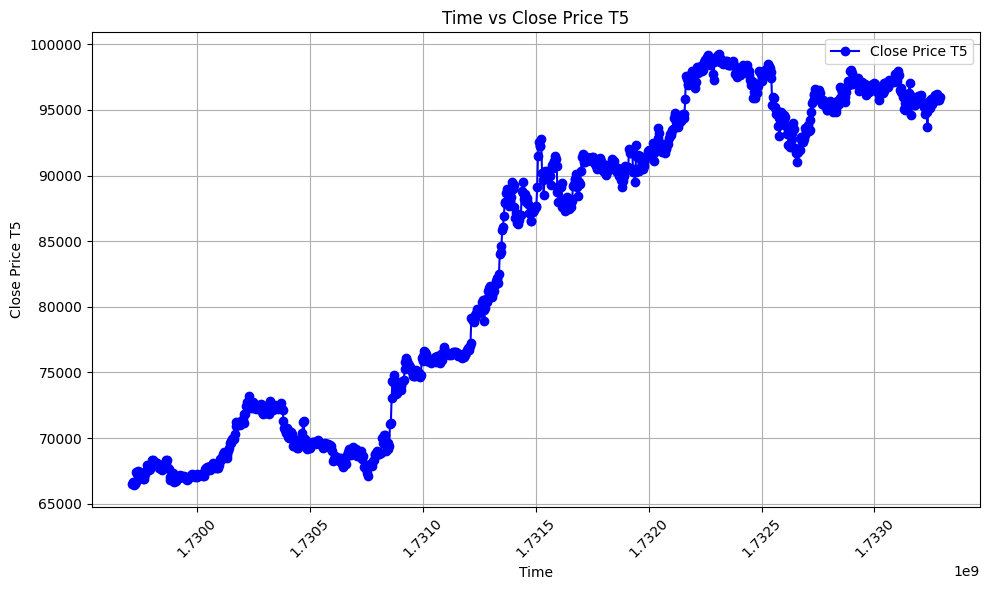

In [12]:

plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['close_price_t5'], label='Close Price T5', color='blue', marker='o')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Close Price T5')
plt.title('Time vs Close Price T5')
plt.grid(True)
plt.legend()

# Rotate time labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
